# Reflecting a Vector Across an Arbitrary Plane

This notebook demonstrates how to find the transformation matrix for reflecting a vector across an arbitrary plane. 

### The Problem

We want to find a matrix $T$ that reflects any vector across a specific plane. We don't have the equation of the plane itself, but we know two vectors that lie *within* the plane, $v_1$ and $v_2$, and a third vector, $v_3$, that is not in the plane.

$v_1 = \begin{pmatrix} 1 \\ 1 \\ 0 \end{pmatrix}$, $v_2 = \begin{pmatrix} 2 \\ 0 \\ 1 \end{pmatrix}$, $v_3 = \begin{pmatrix} 1 \\ 1 \\ 5 \end{pmatrix}$

### The Strategy

Directly calculating the reflection in the standard basis is difficult. The strategy is to switch to a more convenient basis where the reflection is simple, perform the reflection, and then switch back.

1.  **Find a Better Basis:** Use the **Gram-Schmidt process** to convert our set of vectors ($v_1, v_2, v_3$) into an **orthonormal basis** ($e_1, e_2, e_3$). In this new basis, the first two vectors ($e_1, e_2$) will define the plane, and the third vector ($e_3$) will be normal (perpendicular) to it. 

2.  **Reflect in the New Basis:** In the orthonormal basis, reflection is trivial. Any vector component in the direction of $e_1$ or $e_2$ (in the plane) remains unchanged, while the component in the direction of $e_3$ (normal to the plane) gets negated. The reflection matrix in this basis, $T_E$, is very simple.

3.  **Change of Basis:** Use a change of basis formula to convert the simple reflection matrix $T_E$ back into the standard basis to get our final matrix $T$. The formula is $T = E T_E E^{-1}$, where $E$ is the matrix whose columns are our new basis vectors $e_1, e_2, e_3$.

---

## Setup

First, let's import the NumPy library for numerical operations and define our initial vectors.

In [10]:
import numpy as np

# Define the initial vectors
v1 = np.array([1, 1, 0])
v2 = np.array([2, 0, 1])
v3 = np.array([1, 1, 5])

print(f"v1 = {v1}")
print(f"v2 = {v2}")
print(f"v3 = {v3}")

v1 = [1 1 0]
v2 = [2 0 1]
v3 = [1 1 5]


---

## Step 1: Create an Orthonormal Basis via Gram-Schmidt

We will now apply the Gram-Schmidt process to convert $\{v_1, v_2, v_3\}$ into an orthonormal set $\{e_1, e_2, e_3\}$.

The formulas are:
1.  $u_1 = v_1 \implies e_1 = \frac{u_1}{\|u_1\|}$
2.  $u_2 = v_2 - (v_2 \cdot e_1)e_1 \implies e_2 = \frac{u_2}{\|u_2\|}$
3.  $u_3 = v_3 - (v_3 \cdot e_1)e_1 - (v_3 \cdot e_2)e_2 \implies e_3 = \frac{u_3}{\|u_3\|}$

In [11]:
# Calculate e1
u1 = v1
e1 = u1 / np.linalg.norm(u1)
print(f"e1 = {e1}")

# Calculate e2
u2 = v2 - np.dot(v2, e1) * e1
e2 = u2 / np.linalg.norm(u2)
print(f"e2 = {e2}")

# Calculate e3
u3 = v3 - np.dot(v3, e1) * e1 - np.dot(v3, e2) * e2
e3 = u3 / np.linalg.norm(u3)
print(f"e3 = {e3}")

e1 = [0.70710678 0.70710678 0.        ]
e2 = [ 0.57735027 -0.57735027  0.57735027]
e3 = [-0.40824829  0.40824829  0.81649658]


Our new orthonormal basis vectors are:
$e_1 = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ 1 \\ 0 \end{pmatrix} \approx \begin{pmatrix} 0.707 \\ 0.707 \\ 0 \end{pmatrix}$

$e_2 = \frac{1}{\sqrt{3}}\begin{pmatrix} 1 \\ -1 \\ 1 \end{pmatrix} \approx \begin{pmatrix} 0.577 \\ -0.577 \\ 0.577 \end{pmatrix}$

$e_3 = \frac{1}{\sqrt{6}}\begin{pmatrix} -1 \\ 1 \\ 2 \end{pmatrix} \approx \begin{pmatrix} -0.408 \\ 0.408 \\ 0.816 \end{pmatrix}$



---

## Step 2: Define the Reflection in the New Basis

Our plane is spanned by $e_1$ and $e_2$, and $e_3$ is the normal vector. Reflecting across this plane means we preserve the components along $e_1$ and $e_2$ and flip the component along $e_3$. 

The reflection matrix $T_E$ in the basis $E = \{e_1, e_2, e_3\}$ is therefore:

$T_E = \begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & -1 \end{pmatrix}$

In [12]:
# The reflection matrix in the E basis is a diagonal matrix
TE = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, -1]
])

print("Reflection matrix in the orthonormal basis (TE):")
print(TE)

Reflection matrix in the orthonormal basis (TE):
[[ 1  0  0]
 [ 0  1  0]
 [ 0  0 -1]]


---

## Step 3: Change Back to the Standard Basis

To find the reflection matrix $T$ in our original, standard basis, we use the change of basis formula. First, we construct the change of basis matrix $E$ by using our orthonormal vectors as its columns.

$E = \begin{pmatrix} | & | & | \\ e_1 & e_2 & e_3 \\ | & | & | \end{pmatrix}$

The formula for the transformation is $T = E T_E E^{-1}$.

A crucial shortcut: Because $E$ is composed of orthonormal vectors, it is an **orthogonal matrix**. A property of orthogonal matrices is that their inverse is simply their transpose: $E^{-1} = E^T$. This makes computation much easier!

So, our final formula is:
$$ T = E T_E E^T $$

In [13]:
# Construct the change of basis matrix E
# Note: We need to stack the vectors as columns, so we transpose the array of rows.
E = np.array([e1, e2, e3]).T

print("Change of basis matrix (E):")
print(E)

# Calculate the final reflection matrix T using T = E * TE * E_transpose
# We use the @ operator for matrix multiplication
T = E @ TE @ E.T

print("\nFinal Reflection Matrix in Standard Basis (T):")
print(np.round(T, 5)) # Round for cleaner display

Change of basis matrix (E):
[[ 0.70710678  0.57735027 -0.40824829]
 [ 0.70710678 -0.57735027  0.40824829]
 [ 0.          0.57735027  0.81649658]]

Final Reflection Matrix in Standard Basis (T):
[[ 0.66667  0.33333  0.66667]
 [ 0.33333  0.66667 -0.66667]
 [ 0.66667 -0.66667 -0.33333]]


---

## Verification

Let's test our matrix $T$ to see if it works as expected.

1.  A vector **in the plane** (like $v_1$) should be unchanged by the reflection.
2.  The vector **normal to the plane** ($e_3$) should be negated.

In [14]:
# Test 1: Reflect a vector in the plane
reflected_v1 = T @ v1
print(f"Original v1: {v1}")
print(f"Reflected v1: {np.round(reflected_v1, 5)}")
print(f"Test Passes: {np.allclose(v1, reflected_v1)}") # np.allclose checks if two arrays are element-wise equal within a tolerance

# Test 2: Reflect the normal vector
reflected_e3 = T @ e3
print(f"\nOriginal e3: {np.round(e3, 5)}")
print(f"Reflected e3: {np.round(reflected_e3, 5)}")
print(f"Test Passes: {np.allclose(-e3, reflected_e3)}")

Original v1: [1 1 0]
Reflected v1: [1. 1. 0.]
Test Passes: True

Original e3: [-0.40825  0.40825  0.8165 ]
Reflected e3: [ 0.40825 -0.40825 -0.8165 ]
Test Passes: True


## Conclusion
As we can see, the verification works perfectly. We have successfully derived the transformation matrix for reflecting a vector across the plane defined by $v_1$ and $v_2$. 

This process highlights a powerful concept in linear algebra: transforming a problem into a basis where the solution is simple, and then transforming the solution back to the original basis.

Orthonormal basis (E columns):
 [[ 0.707107  0.57735  -0.408248]
 [ 0.707107 -0.57735   0.408248]
 [ 0.        0.57735   0.816497]]

Reflection matrix T (standard basis):
 [[ 0.666667  0.333333  0.666667]
 [ 0.333333  0.666667 -0.666667]
 [ 0.666667 -0.666667 -0.333333]]

Example vector r: [1. 2. 3.]
Reflected r (T @ r): [ 3.333333 -0.333333 -1.666667]


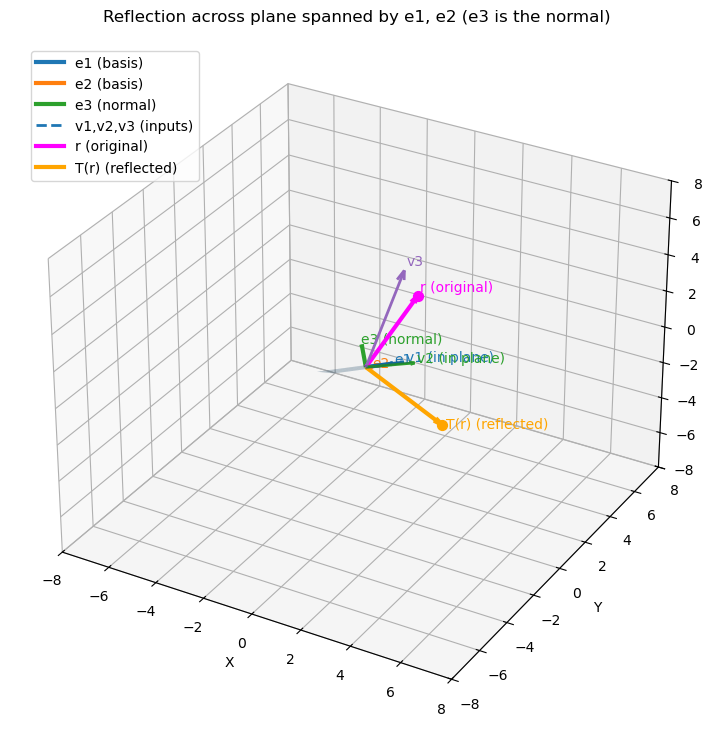

In [15]:
# Visual demo cell: reflection across plane (matplotlib 3D)
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ----------------- Gram-Schmidt (correct projection on current residual) -----------------
def gram_schmidt(vs, tol=1e-12):
    """Return orthonormal basis from list of vectors vs."""
    es = []
    for v in vs:
        u = np.array(v, dtype=float).copy()
        for e in es:
            u -= np.dot(u, e) * e   # project residual onto already-found e and remove
        n = np.linalg.norm(u)
        if n < tol:
            es.append(np.zeros_like(u))  # degenerate -> zero vector placeholder
        else:
            es.append(u / n)
    return es

# ----------------- Input vectors (match your notebook) -----------------
v1 = np.array([1, 1, 0], dtype=float)
v2 = np.array([2, 0, 1], dtype=float)
v3 = np.array([1, 1, 5], dtype=float)

# Build orthonormal basis
e1, e2, e3 = gram_schmidt([v1, v2, v3])

# Build matrices
E = np.column_stack((e1, e2, e3))   # columns are e1,e2,e3
TE = np.diag([1, 1, -1])            # reflect across plane spanned by e1,e2
T = E @ TE @ E.T                    # final reflection matrix in standard basis

# Example vector to reflect (change as you like)
r = np.array([1.0, 2.0, 3.0])
r_ref = T @ r

# Print numeric results
print("Orthonormal basis (E columns):\n", np.round(E, 6))
print("\nReflection matrix T (standard basis):\n", np.round(T, 6))
print("\nExample vector r:", r)
print("Reflected r (T @ r):", np.round(r_ref, 6))

# ----------------- Plotting helpers -----------------
def set_axes_equal(ax):
    """Make 3D axes equal scale (approx)."""
    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()
    x_range = abs(x_limits[1] - x_limits[0])
    x_mid = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_mid = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_mid = np.mean(z_limits)
    max_range = 0.5 * max([x_range, y_range, z_range])
    ax.set_xlim3d([x_mid - max_range, x_mid + max_range])
    ax.set_ylim3d([y_mid - max_range, y_mid + max_range])
    ax.set_zlim3d([z_mid - max_range, z_mid + max_range])

def draw_arrow(ax, vec, color, label=None, linewidth=2, arrow_len_ratio=0.1):
    """Draw arrow from origin to vec using quiver for consistent arrowheads."""
    ax.quiver(0,0,0, vec[0], vec[1], vec[2],
              arrow_length_ratio=arrow_len_ratio, linewidth=linewidth, normalize=False, color=color)
    if label is not None:
        ax.text(vec[0]*1.05, vec[1]*1.05, vec[2]*1.05, label)

# ----------------- Create plot -----------------
fig = plt.figure(figsize=(11,9))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Reflection across plane spanned by e1, e2 (e3 is the normal)")

# Plot original input vectors (dashed)
draw_arrow(ax, v1, color='tab:blue')
ax.text(v1[0]*1.05, v1[1]*1.05, v1[2]*1.05, 'v1 (in plane)', color='tab:blue')
draw_arrow(ax, v2, color='tab:green')
ax.text(v2[0]*1.05, v2[1]*1.05, v2[2]*1.05, 'v2 (in plane)', color='tab:green')
draw_arrow(ax, v3, color='tab:purple')
ax.text(v3[0]*1.05, v3[1]*1.05, v3[2]*1.05, 'v3', color='tab:purple')

# Plot orthonormal basis (solid, thicker)
draw_arrow(ax, e1, color='C0', linewidth=3)
ax.text(e1[0]*1.05, e1[1]*1.05, e1[2]*1.05, 'e1', color='C0')
draw_arrow(ax, e2, color='C1', linewidth=3)
ax.text(e2[0]*1.05, e2[1]*1.05, e2[2]*1.05, 'e2', color='C1')
draw_arrow(ax, e3, color='C2', linewidth=3)
ax.text(e3[0]*1.05, e3[1]*1.05, e3[2]*1.05, 'e3 (normal)', color='C2')

# Plane spanned by e1,e2 (mesh)
s = np.linspace(-1.5, 1.5, 31)
S, Tgrid = np.meshgrid(s, s)
plane = e1[:, None, None] * S[None, :, :] + e2[:, None, None] * Tgrid[None, :, :]
X = plane[0]; Y = plane[1]; Z = plane[2]
ax.plot_surface(X, Y, Z, alpha=0.25, rstride=1, cstride=1, linewidth=0, antialiased=True)

# Plot example vector and its reflection (bold)
draw_arrow(ax, r, color='magenta', linewidth=3)
ax.text(r[0]*1.05, r[1]*1.05, r[2]*1.05, 'r (original)', color='magenta')
draw_arrow(ax, r_ref, color='orange', linewidth=3)
ax.text(r_ref[0]*1.05, r_ref[1]*1.05, r_ref[2]*1.05, 'T(r) (reflected)', color='orange')

# Small markers at r and r_ref for clarity
ax.scatter([r[0]], [r[1]], [r[2]], s=50, color='magenta')
ax.scatter([r_ref[0]], [r_ref[1]], [r_ref[2]], s=50, color='orange')

# Axes labels, grid and limits
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.grid(True)

# Build legend manually
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0],[0], color='C0', lw=3, label='e1 (basis)'),
    Line2D([0],[0], color='C1', lw=3, label='e2 (basis)'),
    Line2D([0],[0], color='C2', lw=3, label='e3 (normal)'),
    Line2D([0],[0], color='tab:blue', lw=2, linestyle='--', label='v1,v2,v3 (inputs)'),
    Line2D([0],[0], color='magenta', lw=3, label='r (original)'),
    Line2D([0],[0], color='orange', lw=3, label='T(r) (reflected)')
]
ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0.02, 0.98))

# Equal scaling
all_vecs = np.column_stack([v1, v2, v3, e1, e2, e3, r, r_ref])
max_coord = np.max(np.abs(all_vecs)) if all_vecs.size else 1.0
ax.set_xlim(-max_coord*1.6, max_coord*1.6)
ax.set_ylim(-max_coord*1.6, max_coord*1.6)
ax.set_zlim(-max_coord*1.6, max_coord*1.6)
set_axes_equal(ax)

plt.show()
